In [105]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly as py 
from plotly.offline import init_notebook_mode, iplot 
init_notebook_mode(connected=True) 
import plotly.graph_objs as go
from math import sqrt

In [40]:
import pandas as pd

df = pd.read_csv('dst_data.csv')
df['Дата'] = df['Дата'].replace({'24:00':'23:59'}, regex=True)
df

,Дата,Базисное значение,Среднесуточное значение,Текущее значение
0,1957-01-01 0:00,0,4,11
1,1957-01-01 1:00,0,4,13
2,1957-01-01 2:00,0,4,12
3,1957-01-01 3:00,0,4,12
4,1957-01-01 4:00,0,4,9
...,...,...,...,...
529595,2014-12-31 20:00,0,-17,-27
529596,2014-12-31 21:00,0,-17,-27
529597,2014-12-31 22:00,0,-17,-23
529598,2014-12-31 23:00,0,-17,-23


In [41]:
df['Дата'] = pd.to_datetime(df['Дата'])

In [42]:
df = df.iloc[429150:]

In [79]:
timeSeries = df.loc[:, ['Дата', 'Текущее значение']]
timeSeries.index = timeSeries['Дата']
ts = timeSeries.drop(['Дата'],axis=1)

In [81]:
ts = ts.iloc[-10000:]

In [82]:

from sklearn.preprocessing import MinMaxScaler
values = ts.values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [83]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [84]:
look_back = 1
X, Y = create_dataset(scaled, look_back)

9999


In [85]:
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

In [86]:
model = Sequential()
model.add(LSTM(100, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(X, Y, epochs=300, batch_size=100, verbose=0, shuffle=False)

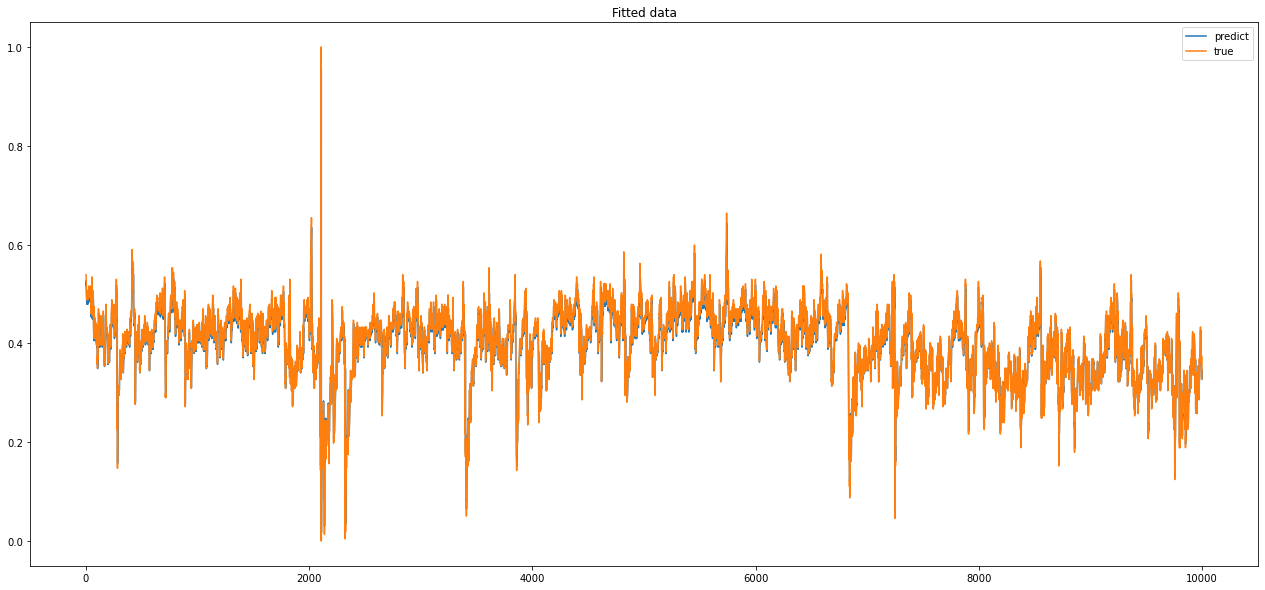

In [87]:
yhat = model.predict(X)

plt.figure(figsize=(22,10))
plt.plot(yhat, label='predict')
plt.plot(Y, label='true')
plt.title('Fitted data')
plt.legend()
plt.show()

In [88]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

7000 3000


In [89]:
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

6999
2999


In [90]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [91]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)


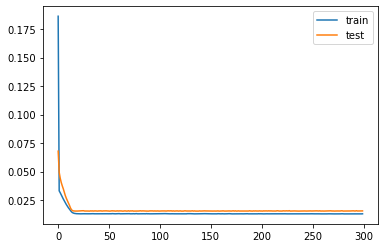

In [93]:

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

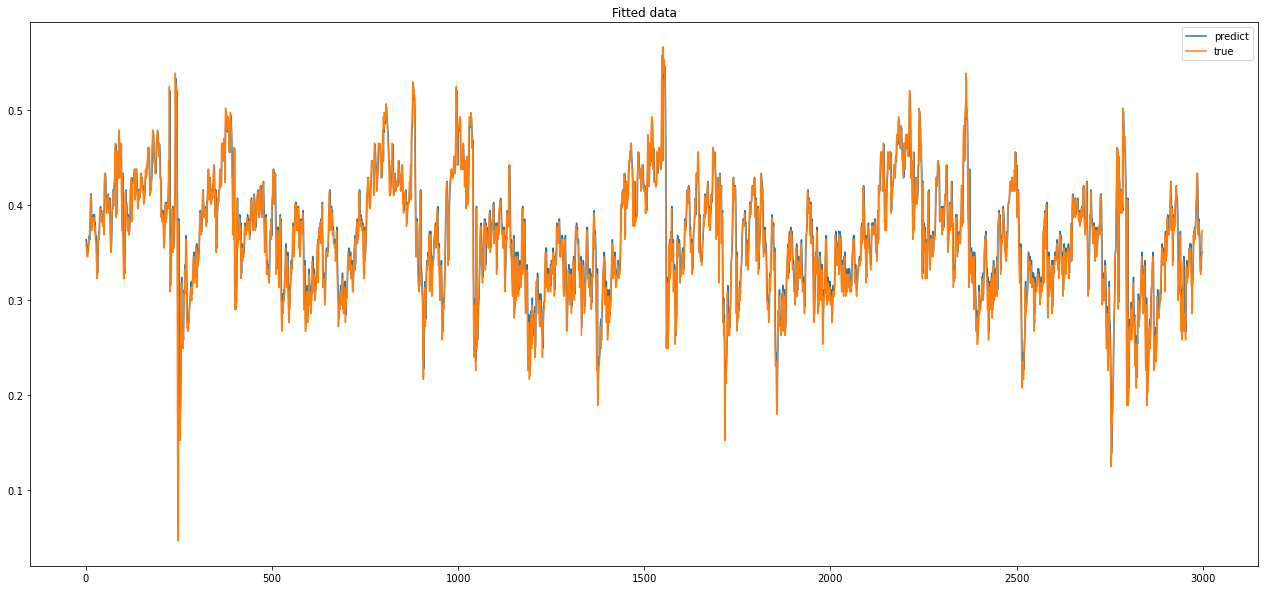

In [102]:
plt.figure(figsize=(22,10))

yhat = model.predict(testX)
plt.plot(yhat, label='predict')
plt.plot(testY, label='true')
plt.title('Fitted data')
plt.legend()
plt.show()

In [95]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

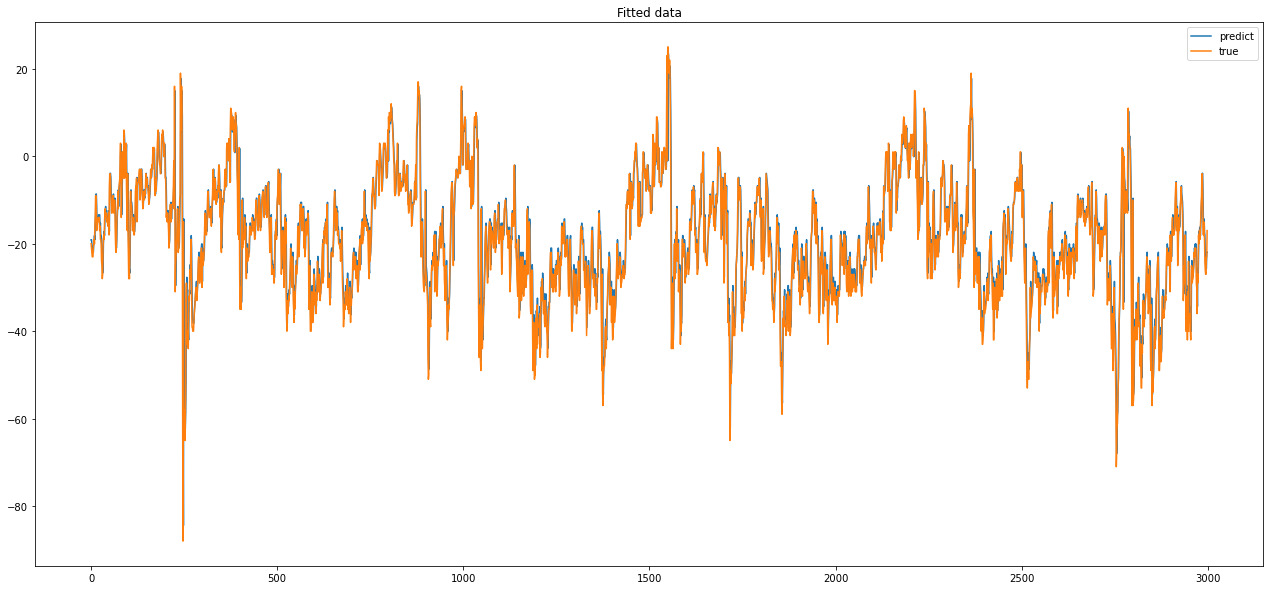

In [103]:
plt.figure(figsize=(22,10))

plt.plot(yhat_inverse, label='predict')
plt.plot(testY_inverse, label='true')
plt.title('Fitted data')
plt.legend()
plt.show()

In [119]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [124]:
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)ы

Test RMSE: 5.283
hello world!


In [117]:
mse = mean_squared_error(testY_inverse, yhat_inverse)
print('Test MSE: %.3f' % mse)

Test MSE: 27.910
